In [2]:
# загрузим библиотеки
# данные библиотеки являются стандартными для пакета Anaconda
import pandas as pd
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import *
from matplotlib import pyplot as plt
from matplotlib import rc
import numpy as np
from sklearn.cluster import KMeans
#данная строчка нужна для корректного отображения графиков
%matplotlib inline 

In [3]:
df=pd.read_excel('на душу населення.xlsx', sheet_name='Лист1') #!!!!!! измените имя файла и название рабочего листа
df.sample(5) #эта команда выведет пять случайных строк таблицы, таблица не отобразиться полностью

,Країна,Офшорні статки,ВВП на душу насел,Загальні податкові втрати,Втрати від под. уникнення,Втрати від под. ухилення,Податк. надходження,Час на податки
28,Центральноафриканська Республіка,0.000000,490.0,7.936882,7.846326,0.090556,32.196141,483.0
39,Куба,8.842699,9402.0,0.126640,0.000000,0.126640,2624.629348,135.0
63,Гвіана,16.585584,7327.0,0.326117,0.025688,0.300429,123.653525,400.0
110,Науру,0.000000,8867.0,0.093366,0.000000,0.093366,1366.654405,136.0
119,Пакистан,18.352610,1260.0,12.232307,12.050756,0.181550,131.524145,283.0


In [4]:
df.info() # информация о столбцах таблицы и типах меременных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Країна                     174 non-null    object 
 1   Офшорні статки             174 non-null    float64
 2   ВВП на душу насел          174 non-null    float64
 3   Загальні податкові втрати  174 non-null    float64
 4   Втрати від под. уникнення  174 non-null    float64
 5   Втрати від под. ухилення   174 non-null    float64
 6   Податк. надходження        174 non-null    float64
 7   Час на податки             174 non-null    float64
dtypes: float64(7), object(1)
memory usage: 11.0+ KB


In [5]:
df.describe()

,Офшорні статки,ВВП на душу насел,Загальні податкові втрати,Втрати від под. уникнення,Втрати від под. ухилення,Податк. надходження,Час на податки
count,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000
mean,10565.224974,13398.752184,238.487006,45.799938,192.687069,3218.029976,231.640805
std,65312.816770,19236.085120,1510.223910,108.283717,1436.849998,5495.294039,181.616048
min,0.000000,254.000000,0.020053,0.000000,0.000000,4.364216,34.500000
25%,35.646018,1977.750000,5.461119,2.064364,0.416077,279.764764,134.250000
50%,195.020831,4871.500000,16.843643,10.604996,2.457917,1005.671307,187.000000
75%,2277.887912,14975.250000,88.415820,41.447553,31.120710,2964.420594,269.500000
max,813101.818939,116921.000000,19570.584732,959.767058,18610.817675,30058.989453,1501.000000


In [6]:
df.columns #ниже выводит список столцов, удобно для копирования

Index(['Країна', 'Офшорні статки', 'ВВП на душу насел',
       'Загальні податкові втрати', 'Втрати від под. уникнення',
       'Втрати від под. ухилення', 'Податк. надходження', 'Час на податки'],
      dtype='object')

In [7]:
col=['Офшорні статки', 'ВВП на душу насел', 'Загальні податкові втрати', 'Втрати від под. уникнення', 'Втрати від под. ухилення', 'Податк. надходження', 'Час на податки'] # !!!!!! укажите количественные (int, float) столбцы, 
#                                       по которым выполним кластеризацию

In [8]:
pd.options.mode.chained_assignment = None 
df[col].fillna(0, inplace=True)

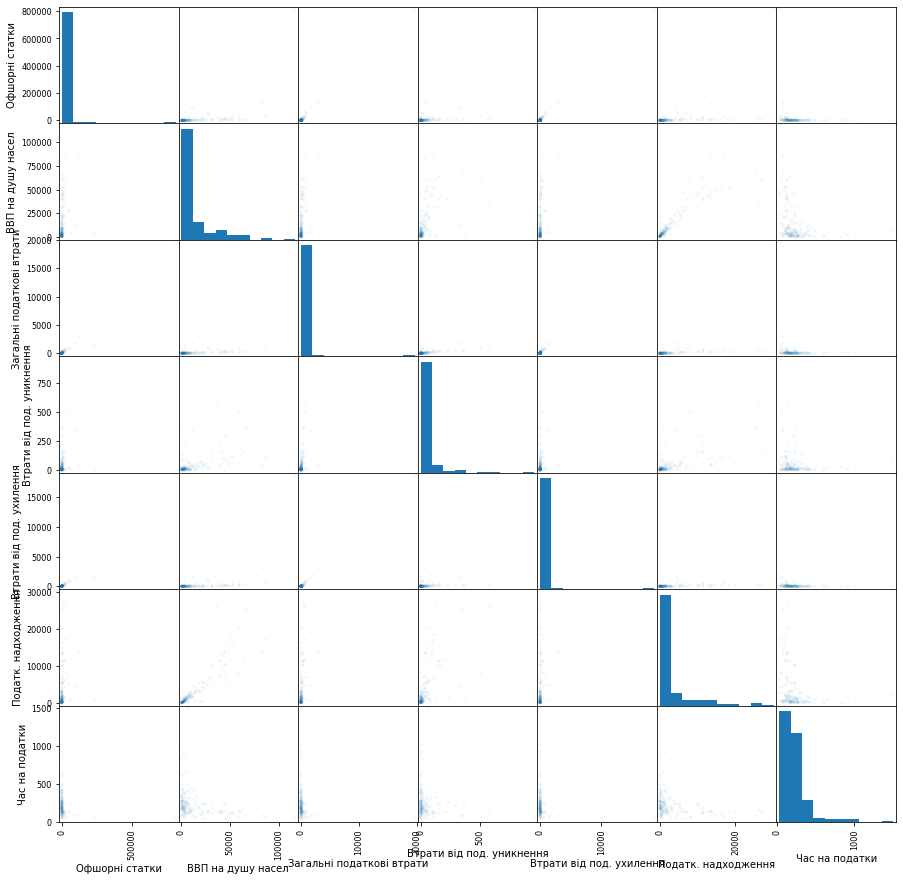

In [9]:
# матрица рассеяния и гистограммы
from pandas.plotting import scatter_matrix
scatter_matrix(df[col], alpha=0.05, figsize=(15, 15));

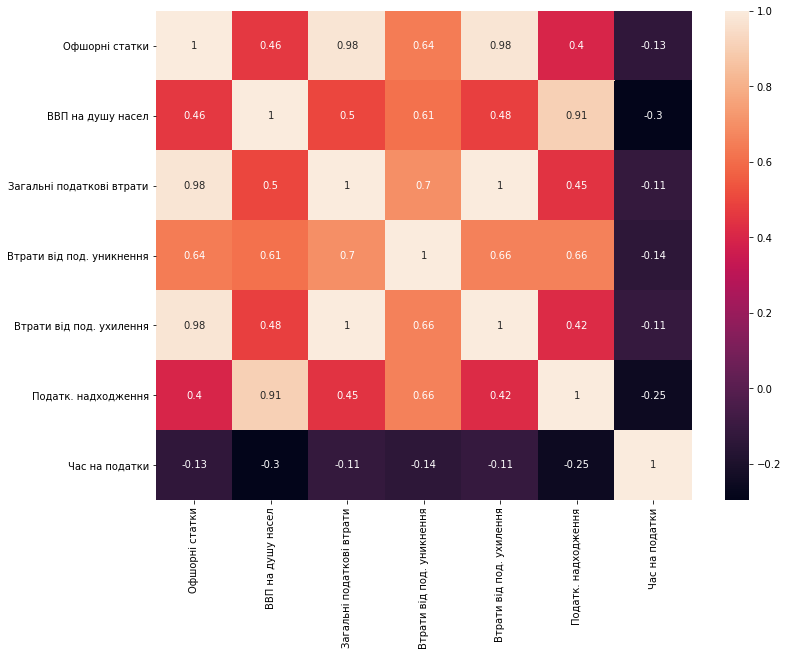

In [10]:
# Cheking correlations
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True)
plt.show()

In [11]:
df[col].corr() # парные корреляции

,Офшорні статки,ВВП на душу насел,Загальні податкові втрати,Втрати від под. уникнення,Втрати від под. ухилення,Податк. надходження,Час на податки
Офшорні статки,1.000000,0.462002,0.975938,0.641396,0.977438,0.401244,-0.129934
ВВП на душу насел,0.462002,1.000000,0.503037,0.613434,0.482496,0.907477,-0.296352
Загальні податкові втрати,0.975938,0.503037,1.000000,0.696997,0.998539,0.447909,-0.114700
Втрати від под. уникнення,0.641396,0.613434,0.696997,1.000000,0.657228,0.658381,-0.141387
Втрати від под. ухилення,0.977438,0.482496,0.998539,0.657228,1.000000,0.421165,-0.109902
Податк. надходження,0.401244,0.907477,0.447909,0.658381,0.421165,1.000000,-0.252517
Час на податки,-0.129934,-0.296352,-0.114700,-0.141387,-0.109902,-0.252517,1.000000


In [12]:
# загружаем библиотеку препроцесинга данных
# эта библиотека автоматически приведен данные к нормальным значениям
from sklearn import preprocessing
dataNorm = preprocessing.MinMaxScaler().fit_transform(df[col].values)

In [13]:
# Вычислим расстояния между каждым набором данных,
# т.е. строками массива data_for_clust
# Вычисляется евклидово расстояние (по умолчанию)
data_dist = pdist(dataNorm, 'euclidean')
# Главная функция иерархической кластеризии
# Объедение элементов в кластера и сохранение в 
# специальной переменной (используется ниже для визуализации 
# и выделения количества кластеров
data_linkage = linkage(data_dist, method='average')

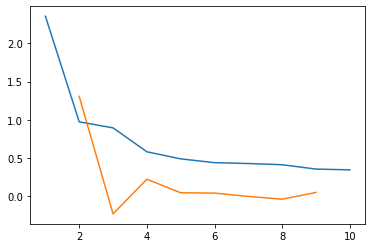

Рекомендованное количество кластеров: 2


In [14]:
# Метод локтя. Позволячет оценить оптимальное количество сегментов.
# Показывает сумму внутри групповых вариаций
last = data_linkage[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2 
print("Рекомендованное количество кластеров:", k)

In [15]:
#функция построения дендрограмм
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

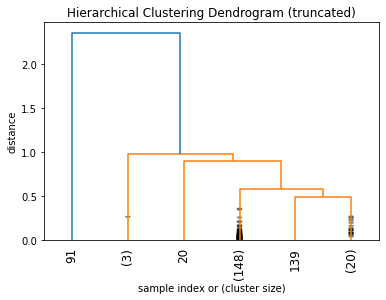

In [16]:
# !!!!!!!!! количество кластеров будете использовать!
nClust=6

#строим дендрограмму 
fancy_dendrogram(
    data_linkage,
    truncate_mode='lastp',
    p=nClust, 
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,
)
plt.show()

In [17]:
# иерархическая кластеризация
clusters=fcluster(data_linkage, nClust, criterion='maxclust')
clusters

array([2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 5, 2,
       2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 2, 3, 2, 2, 3, 3, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 6, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 3, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       3, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [18]:
col

['Офшорні статки',
 'ВВП на душу насел',
 'Загальні податкові втрати',
 'Втрати від под. уникнення',
 'Втрати від под. ухилення',
 'Податк. надходження',
 'Час на податки']

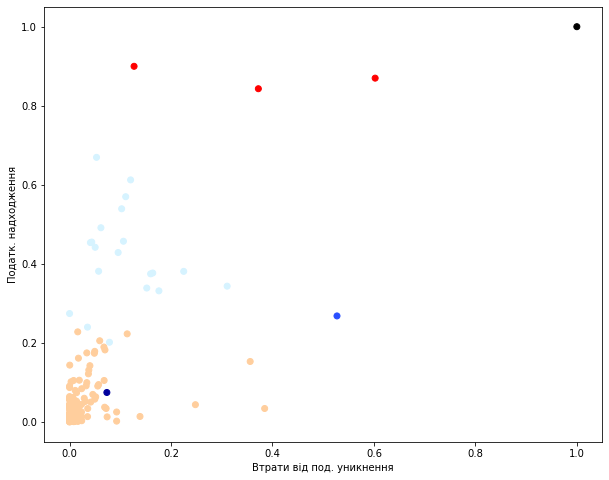

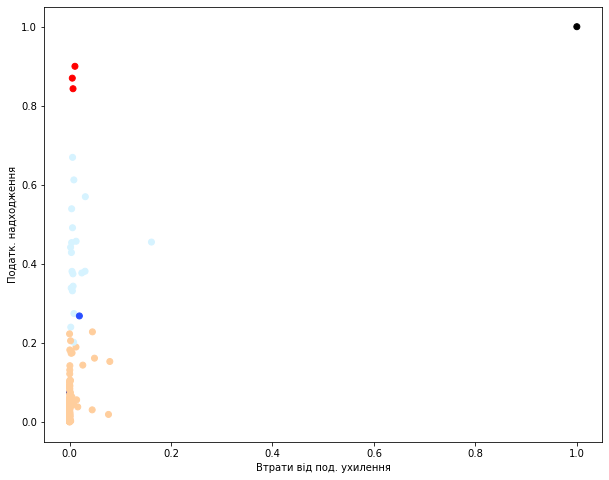

In [35]:
x=3 # Чтобы построить диаграмму в разных осях, меняйте номера столбцов
y=-2 #
plt.figure(figsize=(10, 8))
plt.scatter(dataNorm[:,x], dataNorm[:,y], c=clusters, cmap='flag')
plt.xlabel(col[x])
plt.ylabel(col[y]);
plt.show()

x=4 # Чтобы построить диаграмму в разных осях, меняйте номера столбцов
y=-2 #
plt.figure(figsize=(10, 8))
plt.scatter(dataNorm[:,x], dataNorm[:,y], c=clusters, cmap='flag')
plt.xlabel(col[x])
plt.ylabel(col[y]);
plt.show()

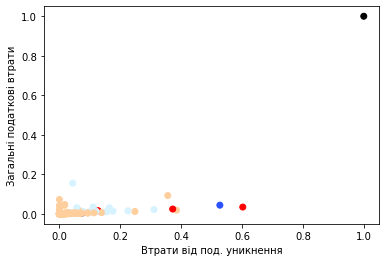

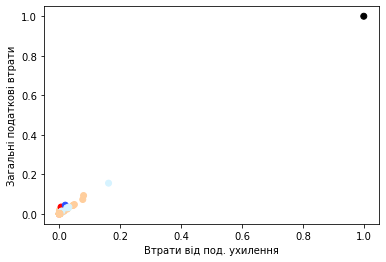

In [20]:
x=3 # Чтобы построить диаграмму в разных осях, меняйте номера столбцов
y=2 #
plt.figure(figsize=(6, 4))
plt.scatter(dataNorm[:,x], dataNorm[:,y], c=clusters, cmap='flag')
plt.xlabel(col[x])
plt.ylabel(col[y]);
plt.show()

x=4 # Чтобы построить диаграмму в разных осях, меняйте номера столбцов
y=2 #
plt.figure(figsize=(6, 4))
plt.scatter(dataNorm[:,x], dataNorm[:,y], c=clusters, cmap='flag')
plt.xlabel(col[x])
plt.ylabel(col[y]);
plt.show()

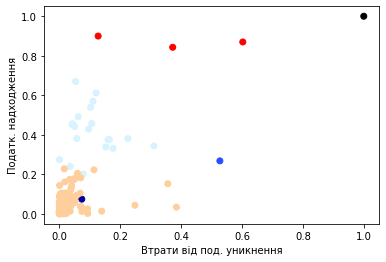

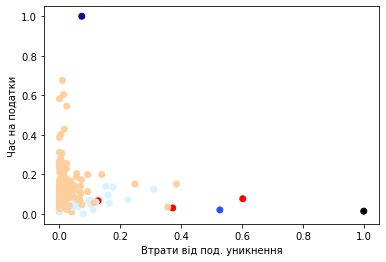

In [21]:
x=3 # Чтобы построить диаграмму в разных осях, меняйте номера столбцов
y=5 #
plt.figure(figsize=(6, 4))
plt.scatter(dataNorm[:,x], dataNorm[:,y], c=clusters, cmap='flag')
plt.xlabel(col[x])
plt.ylabel(col[y]);
plt.show()

x=3 # Чтобы построить диаграмму в разных осях, меняйте номера столбцов
y=6 #
plt.figure(figsize=(6, 4))
plt.scatter(dataNorm[:,x], dataNorm[:,y], c=clusters, cmap='flag')
plt.xlabel(col[x])
plt.ylabel(col[y]);
plt.show()

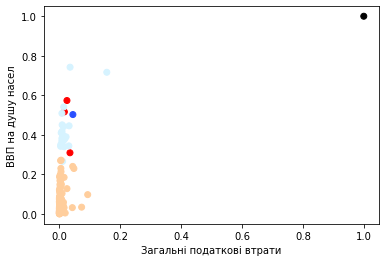

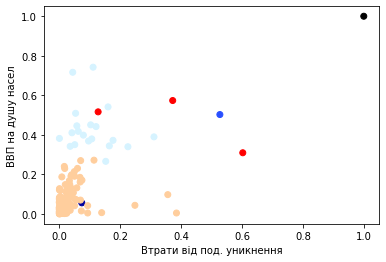

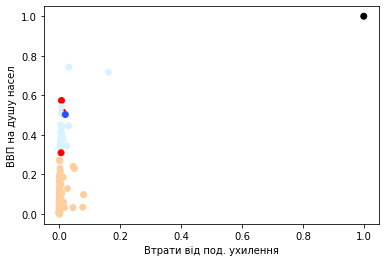

In [22]:
x=2 # Чтобы построить диаграмму в разных осях, меняйте номера столбцов
y=1 #
plt.figure(figsize=(6, 4))
plt.scatter(dataNorm[:,x], dataNorm[:,y], c=clusters, cmap='flag')
plt.xlabel(col[x])
plt.ylabel(col[y]);
plt.show()

x=3 # Чтобы построить диаграмму в разных осях, меняйте номера столбцов
y=1 #
plt.figure(figsize=(6, 4))
plt.scatter(dataNorm[:,x], dataNorm[:,y], c=clusters, cmap='flag')
plt.xlabel(col[x])
plt.ylabel(col[y]);
plt.show()

x=4 # Чтобы построить диаграмму в разных осях, меняйте номера столбцов
y=1 #
plt.figure(figsize=(6, 4))
plt.scatter(dataNorm[:,x], dataNorm[:,y], c=clusters, cmap='flag')
plt.xlabel(col[x])
plt.ylabel(col[y]);
plt.show()

In [23]:
# к оригинальным данным добавляем номер кластера
df['I']=clusters
res=df.groupby('I')[col].mean()
res['Количество']=df.groupby('I').size().values
res #ниже средние цифры по кластерам и количество объектов (Количество)

,Офшорні статки,ВВП на душу насел,Загальні податкові втрати,Втрати від под. уникнення,Втрати від под. ухилення,Податк. надходження,Час на податки,Количество
I,,,,,,,,
1,9747.778594,54673.333333,493.949190,352.481384,141.467806,26179.239952,119.333333,3
2,4576.401004,6590.066757,75.091208,22.410191,52.681017,1280.569172,241.459459,148
3,14293.921577,50471.350000,419.646974,102.935791,316.711183,12574.722382,129.575000,20
4,32719.806448,58902.000000,865.941775,505.979095,359.962680,8070.429807,64.000000,1
5,98.404079,6783.000000,71.926818,70.574758,1.352060,2251.391746,1501.000000,1
6,813101.818939,116921.000000,19570.584732,959.767058,18610.817675,30058.989453,55.000000,1


In [24]:
df.describe()

,Офшорні статки,ВВП на душу насел,Загальні податкові втрати,Втрати від под. уникнення,Втрати від под. ухилення,Податк. надходження,Час на податки,I
count,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000
mean,10565.224974,13398.752184,238.487006,45.799938,192.687069,3218.029976,231.640805,2.149425
std,65312.816770,19236.085120,1510.223910,108.283717,1436.849998,5495.294039,181.616048,0.527372
min,0.000000,254.000000,0.020053,0.000000,0.000000,4.364216,34.500000,1.000000
25%,35.646018,1977.750000,5.461119,2.064364,0.416077,279.764764,134.250000,2.000000
50%,195.020831,4871.500000,16.843643,10.604996,2.457917,1005.671307,187.000000,2.000000
75%,2277.887912,14975.250000,88.415820,41.447553,31.120710,2964.420594,269.500000,2.000000
max,813101.818939,116921.000000,19570.584732,959.767058,18610.817675,30058.989453,1501.000000,6.000000


In [25]:
df[df['I']==2] # !!!!! меняйте номер кластера

,Країна,Офшорні статки,ВВП на душу насел,Загальні податкові втрати,Втрати від под. уникнення,Втрати від под. ухилення,Податк. надходження,Час на податки,I
0,Афганістан,5.569879,581.0,0.080457,0.016649,0.063808,43.514594,270.0,2
1,Албанія,104.529715,5287.0,16.468983,15.152136,1.316847,911.629963,252.0,2
2,Алжир,80.069073,3263.0,11.955513,10.548494,1.407019,617.629836,265.0,2
3,Ангола,802.965768,2012.0,76.023336,69.190008,6.833328,1033.222709,287.0,2
4,Аргентина,446.317676,8555.0,61.139968,53.326215,7.813753,2737.578387,311.5,2
...,...,...,...,...,...,...,...,...,...
169,Венесуела,523.692378,1691.0,22.128281,13.223875,8.904405,1585.935446,920.0,2
170,В'єтнам,32.863095,3499.0,4.461183,3.892608,0.568575,454.370714,384.0,2
171,Ємен,18.077203,620.0,2.012767,1.872798,0.139968,68.753817,248.0,2
172,Замбія,137.236013,981.0,8.569521,5.973982,2.595539,208.473635,158.0,2


In [36]:
df[df['I']==4] # !!!!! меняйте номер кластера

,Країна,Офшорні статки,ВВП на душу насел,Загальні податкові втрати,Втрати від под. уникнення,Втрати від под. ухилення,Податк. надходження,Час на податки,I
139,Сінгапур,32719.806448,58902.0,865.941775,505.979095,359.96268,8070.429807,64.0,4


In [27]:
df[df['I']==6] # !!!!! меняйте номер кластера

,Країна,Офшорні статки,ВВП на душу насел,Загальні податкові втрати,Втрати від под. уникнення,Втрати від под. ухилення,Податк. надходження,Час на податки,I
91,Люксембург,813101.818939,116921.0,19570.584732,959.767058,18610.817675,30058.989453,55.0,6


# KMeans

In [28]:
# строим кластеризаци методом KMeans
km = KMeans(n_clusters=nClust).fit(dataNorm)

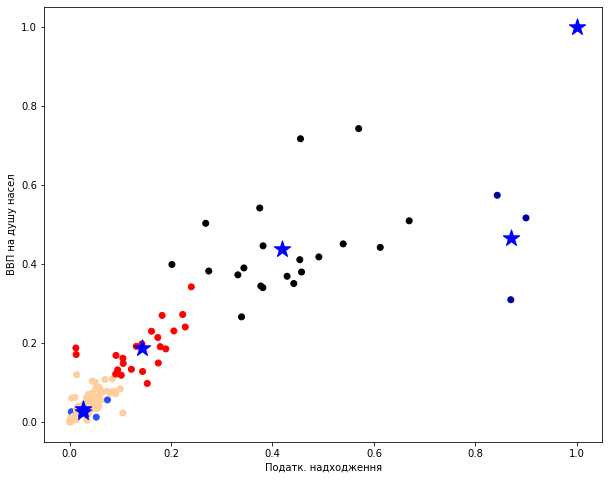

In [29]:
x=5 # Чтобы построить диаграмму в разных осях, меняйте номера столбцов
y=1 #
centroids = km.cluster_centers_
plt.figure(figsize=(10, 8))
plt.scatter(dataNorm[:,x], dataNorm[:,y], c=km.labels_, cmap='flag')
plt.scatter(centroids[:, x], centroids[:, y], marker='*', s=300,
            c='blue', label='centroid')
plt.xlabel(col[x])
plt.ylabel(col[y]);
plt.show()

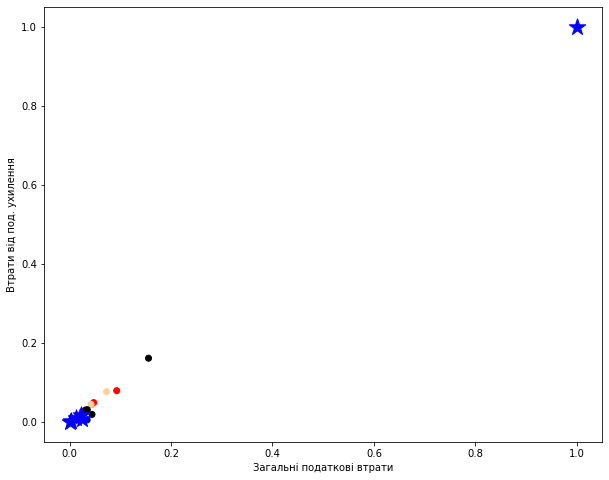

In [30]:
x=2 # Чтобы построить диаграмму в разных осях, меняйте номера столбцов
y=4 #
centroids = km.cluster_centers_
plt.figure(figsize=(10, 8))
plt.scatter(dataNorm[:,x], dataNorm[:,y], c=km.labels_, cmap='flag')
plt.scatter(centroids[:, x], centroids[:, y], marker='*', s=300,
            c='blue', label='centroid')
plt.xlabel(col[x])
plt.ylabel(col[y]);
plt.show()

In [31]:
# Fitting K-Means to the dataset
km = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0).fit_predict(dv)
kms = KMeans(n_clusters = 3, random_state = 0).fit(dv)
pd.DataFrame(kms.cluster_centers_, columns = ['Офшорні статки', 'ВВП на душу нова', 'Загальні податкові втрати',
       'Втрати від под. уникнення', 'Втрати від под. ухилення',
       'Податк. надходження', 'Час на податки']).round(2)

NameError: name 'dv' is not defined